# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar



## XG Boost

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


In [2]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

### Data setting

In [3]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [4]:
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [5]:
xgb = XGBClassifier()

### Model Trainning

In [6]:
xgb.fit(X_train, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [7]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([4, 5, 4, ..., 4, 2, 2], dtype=int64)

In [8]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test_xgb[0:5]))

first five predicted values: [4 5 4 2 3]
first five actual values: [3, 5, 1, 3, 3]


C:\Users\oscar\AppData\Local\Temp\ipykernel_21428\2666105826.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("first five actual values:", list(y_test_xgb[0:5]))


In [9]:
print("accuracy:", round(accuracy_score(y_test_xgb, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))

accuracy: 0.58
recall: 0.58
precision: 0.57
f1-score: 0.57


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


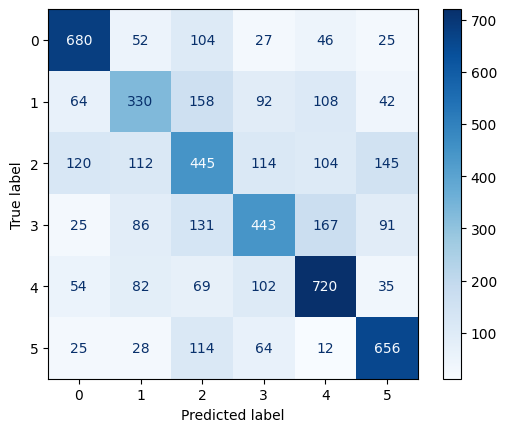

In [10]:
# plot confusion matrix

plot_confusion_matrix(xgb, X_test, y_test_xgb, cmap = plt.cm.Blues);

### Evaluation metrics 

In [28]:
print("accuracy:", round(accuracy_score(y_test_xgb, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))

accuracy: 0.58
recall: 0.58
precision: 0.57
f1-score: 0.57


In [11]:
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       934
           1       0.48      0.42      0.44       794
           2       0.44      0.43      0.43      1040
           3       0.53      0.47      0.50       943
           4       0.62      0.68      0.65      1062
           5       0.66      0.73      0.69       899

    accuracy                           0.58      5672
   macro avg       0.57      0.57      0.57      5672
weighted avg       0.57      0.58      0.57      5672



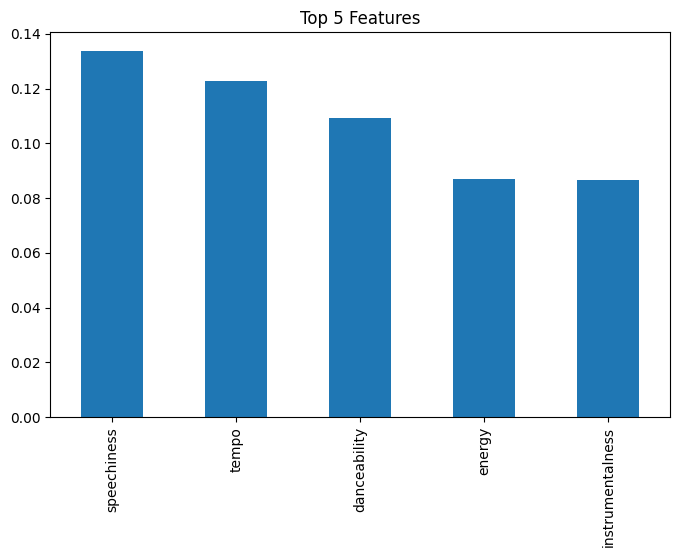

In [12]:
feature_importance_plot(xgb, X_train,5)

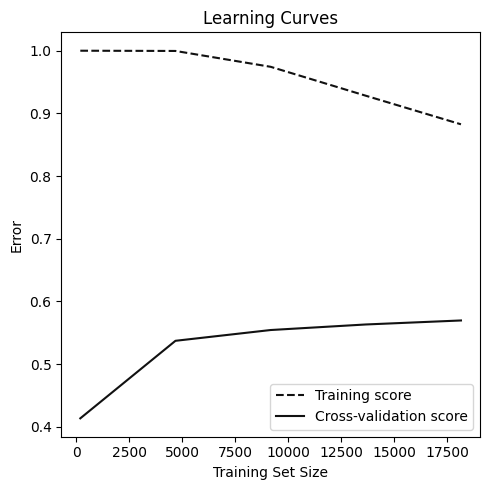

In [13]:
learning_curve_plot(xgb, X_train, y_train_xgb, scoring = 'accuracy')

# Hyperparameter

A hyperparameter tunning was used in order to improve the model

### Model setting

In [26]:
XGBClassifier(n_estimators=500)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

- n_estimators hyperparameter from 100 to 500 
- step of 100
- max_features hyperparameter from 0.1 to 1.0 
- step of 0.05

In [15]:

params = {'n_estimators':np.arange(100,500,100),
          'max_features':np.arange(0.1,1.0,0.2)}

We use Grid search as the hyperparameter algorith

In [16]:
grid_search = GridSearchCV(xgb,
                           params,
                           cv=5, 
                           scoring="r2",
                           verbose=1,
                           n_jobs=-1
                           )
grid_search.fit(X_train,y_train_xgb)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[13:06:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ...),
             n_jobs=-1,
             param_grid={'max_features': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='r2', verbose=1)

In [25]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ",grid_search.best_score_)

Best parameters:  {'max_features': 0.1, 'n_estimators': 400}
Best score:  0.23575547773779357


Import the best parameters

In [19]:
xgb_tuned = XGBClassifier(**grid_search.best_params_)
xgb_tuned.fit(X_train, y_train_xgb)

[13:07:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_features=0.1, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', ...)

### Evaluation metrics 

In [22]:

y_pred_train_xgb = xgb_tuned.predict(X_train)

print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       934
           1       0.48      0.42      0.44       794
           2       0.44      0.43      0.43      1040
           3       0.53      0.47      0.50       943
           4       0.62      0.68      0.65      1062
           5       0.66      0.73      0.69       899

    accuracy                           0.58      5672
   macro avg       0.57      0.57      0.57      5672
weighted avg       0.57      0.58      0.57      5672



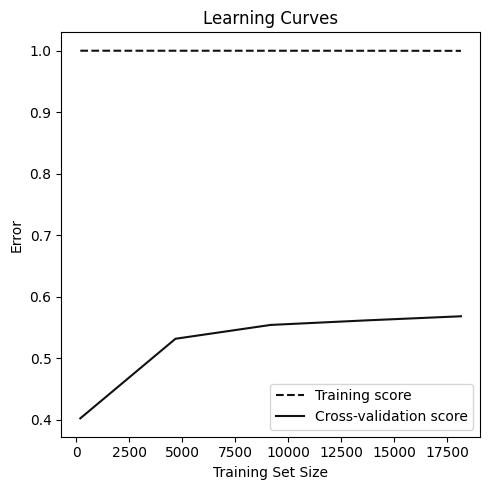

In [24]:
learning_curve_plot(xgb_tuned, X_train, y_train_xgb, scoring = 'accuracy')

# model still overfitting need to do some tuning

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


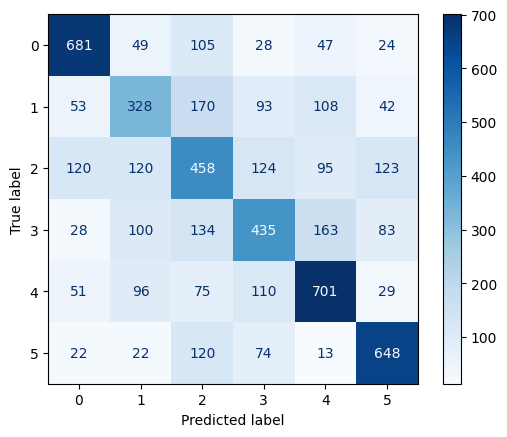

In [29]:
plot_confusion_matrix(xgb_tuned, X_test, y_test_xgb, cmap = plt.cm.Blues);

### Summary

Comments
+ The XGBoost model with the hyperparameter tunning presents the following values:
    - accuracy: 0.58
    - recall: 0.58
    - precision: 0.57
    - f1-score: 0.57
+ The trainning curve demonstrate an improvement over the other two models.
+ The best model overall